In [1]:
# Author       : Utkarsh Kulshrestha
# E-Mail       : kuls.utkarsh1205@gmail.com
# Contact      : +91-8197094433
# Designation  : Artificial Intelligence Engineer

## Import the required libraries

In [2]:
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

## Read the Data from the CSV

In [3]:
dummy_df = pd.read_csv(r"C:\Users\hindo\Downloads\bank.csv", na_values =['NA'])
temp = dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [4]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Pre-Processing

In [5]:
contact_df = dummy_df

In [6]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [7]:
encoded_df = preprocessor(contact_df)

x = encoded_df.drop(['deposit'],axis =1).values
y = encoded_df['deposit'].values

## Split the data into Train-Test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model

In [9]:
# Decision tree with depth = 2
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)
#y_pred_dt = model_dt_2.predict_proba(x_test)[:, 1]

Training score:  0.7140777242692351
Testing score:  0.6999552171965965


In [10]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)


Training score:  0.7978497032142458
Testing score:  0.7756381549484997


In [11]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8565348863254564
Testing score:  0.8298253470667264


In [12]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 14, criterion ="gini",min_samples_leaf=15,min_samples_split=3)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

## Performance Metrics

In [13]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [14]:
predictions = model_dt.predict(x_test)
predictions

array([0, 1, 0, ..., 1, 0, 0])

In [15]:
yactlres=0
for i in range(len(predictions)):
    if(predictions[i] == 1):
        yactlres=np.vstack((yactlres, y_test[i]))

## Recall

In [16]:
#Recall
y_actl_res = yactlres.flatten()
count = 0
for result in yactlres:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(yactlres)))

true yes|predicted yes:
0.8060548722800378


## Area Under the Curve

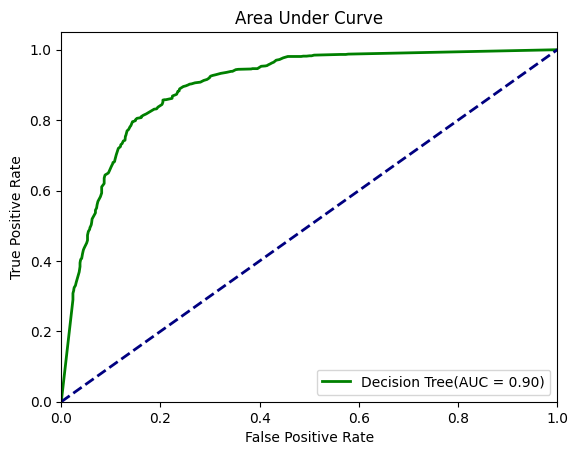

In [17]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [18]:
print (confusion_matrix(y_test, predictions))

[[987 204]
 [190 852]]


In [19]:
accuracy_score(y_test, predictions)

0.8235557545902373

In [20]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

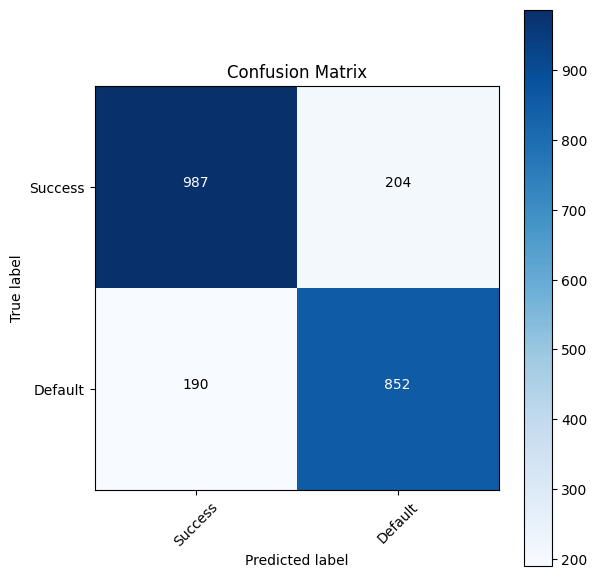

In [21]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()

# Hyperparameters for Decision Tree using GridSearchCV

In [22]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_leaf': [3,4,5,6,7,8,9,10,11,12],
              'min_samples_split': [3,4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy']
             }
D_m=DecisionTreeClassifier(random_state=1)
cv_rf = GridSearchCV(D_m, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 3}
Time taken in grid search:  195.04


In [26]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12],
              'min_samples_leaf': [3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_split': [3,4,5,6,7,8,9,10,11,12,13,14,15],
              'criterion': ['gini']
             }
D_m=DecisionTreeClassifier(random_state=1)
cv_rf = GridSearchCV(D_m, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 15, 'min_samples_split': 3}
Time taken in grid search:  133.71


In [25]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
              'min_samples_leaf': [3,4,5,6,7,8,9,10,11,12,13,14],
              'min_samples_split': [3,4,5,6,7,8,9,10],
              'criterion': ['gini', 'entropy']
             }
D_m=DecisionTreeClassifier(random_state=1)
cv_rf = GridSearchCV(D_m,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 13, 'min_samples_split': 3}
Time taken in grid search:  100.60
